In [1]:
# Req#1 Dimensioni del dataset e metadai
import pandas as pd

df = pd.read_csv("C:/Users/matte/EPICODE/PYTHON EXAM/owid-covid-data.csv")

#Dimensioni
print(f'Dimensioni del Dataset: {df.shape} \n')

#Metadati
# per questo tipo di dataset, è importante estrarre le colonne e i relativi tipi tramite il metodo .info() 
# e le stastistiche quali mean, min tramite il metodo .describe()
print('Analisi metadata nel dataset: \n')
df.info()

print(f'\nSommario statistico nel dataset: {df.describe()} \n')

# è anche molto utile una panoramica sui dati nulli e sui dati unici presenti nel dataset
print(f'\nAnalisi dati nulli nel dataset: {df.isna().sum()} \n')
print(f'\nAnalisi dati unici nel dataset: {df.nunique()} \n')

Dimensioni del Dataset: (429435, 67) 

Analisi metadata nel dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9  

In [2]:
# Req#2 Trovare per ogni continente 
    # nr di caso da inizio pandemia
    # percentuale -rispetto al totale mondiale- del nr di casi
import pandas as pd
import humanize

df = pd.read_csv('C:/Users/matte/EPICODE/PYTHON EXAM/owid-covid-data.csv')

# l'analisi sul dataset mi ha fatto comprendere che è stato gestito inserendo i dati giornalieri per ogni <location>

# Per filtrare in maniera coerente i dati, ho scelto di ordinare per <date> crescente e raggruppare per <location>
# e dunque di estrapolare l'ultimo dato aggiornato per la colonna [total_cases}
# il risultato è un df <latest> che contiene, per ogni <location>, l’ultima osservazione disponibile.
latest = df.sort_values('date').groupby('location', as_index=False).last()

loc_cases = latest[['location', 'total_cases']] #lascio integro il df principale e lavoro su un df ad-hoc
loc_cases = loc_cases.dropna(subset=['total_cases']) #ripulisco da dati nulli
loc_cases['total_cases'] = loc_cases['total_cases'].astype(int).apply(humanize.intword) #per migliorare la leggibilità

print(loc_cases[['location', 'total_cases']])

# per la 2a richiesta, estrapolo i dati aggregati per continente e li elaboro fino ad ottenere la percentuale richiesta
# il df risultante <continent_cases> avrà due colonne: continent e total_cases, dove quest’ultima rappresenta il totale dei casi per quel continente
continent_cases = (latest.groupby('continent', as_index=False)['total_cases'].sum())

world_total = continent_cases['total_cases'].sum().round(2)

continent_cases['percent_of_world'] = (
    continent_cases['total_cases'] / world_total * 100
).round(2)

continent_cases['total_cases'] = continent_cases['total_cases'].astype(int).apply(humanize.intcomma) #per migliorare le leggibilità
continent_cases["percent_of_world"] = continent_cases["percent_of_world"].map("{:.2f}%".format)

print(f'\n{continent_cases}')

              location     total_cases
0          Afghanistan  230.4 thousand
1               Africa    13.1 million
2              Albania  334.6 thousand
3              Algeria  272.0 thousand
4       American Samoa    8.4 thousand
..                 ...             ...
249  Wallis and Futuna    3.5 thousand
251              World   773.8 million
252              Yemen   11.9 thousand
253             Zambia  349.3 thousand
254           Zimbabwe  266.1 thousand

[246 rows x 2 columns]

       continent  total_cases percent_of_world
0         Africa   13,133,432            1.70%
1           Asia  301,161,412           38.92%
2         Europe  251,799,045           32.54%
3  North America  124,427,381           16.08%
4        Oceania   14,658,184            1.89%
5  South America   68,624,053            8.87%


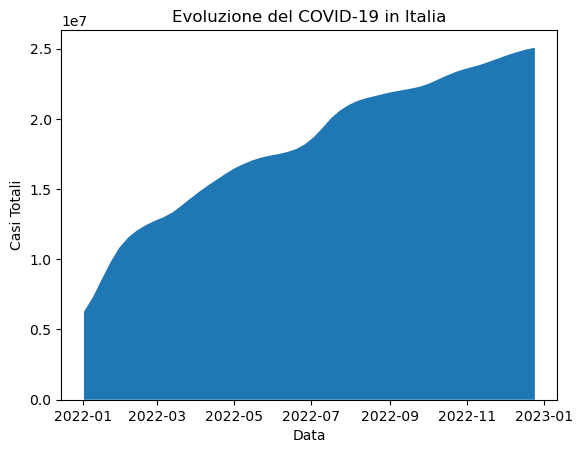

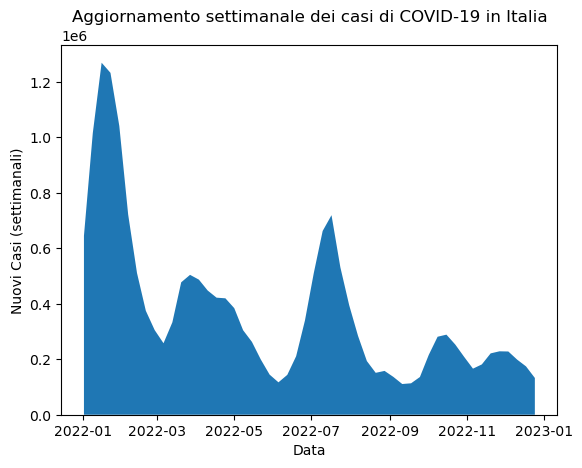

In [3]:
# Req#3 Selezionare i dati rel. all'Italia nel 2022
    # evoluzione del casi totali da inizio a fineanno
    # nr di nuovi casi rispetto alla data

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/matte/EPICODE/PYTHON EXAM/owid-covid-data.csv', parse_dates=['date'])

df['date'] = pd.to_datetime(df['date'],format='%d/%m/%Y') #fornisco la conversione corretta
mask = (df['location'] == 'Italy') & (df['date'].dt.year == 2022) # imposto i parametri della mask
italy_2022 = df.loc[mask] 

#ripulisco il dataset
italy_2022 = italy_2022[italy_2022['new_cases'] != 0] #trattandosi di aggiornamento settimanale, 6 valori su 7 sono inconsistenti
italy_2022 = italy_2022.dropna(subset=['total_cases'])
italy_2022 = italy_2022.dropna(subset=['new_cases']) 

# Espongo tramite grafico l'evoluzione dei casi nel 2022
plt.stackplot(italy_2022['date'],
         italy_2022['total_cases']
)
plt.title('Evoluzione del COVID‑19 in Italia')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.show()

# Espongo tramite grafico il nr di nuovi casi settimanale
plt.stackplot(italy_2022['date'],
        italy_2022['new_cases']
)
plt.title('Aggiornamento settimanale dei casi di COVID‑19 in Italia')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi (settimanali)')
plt.show()

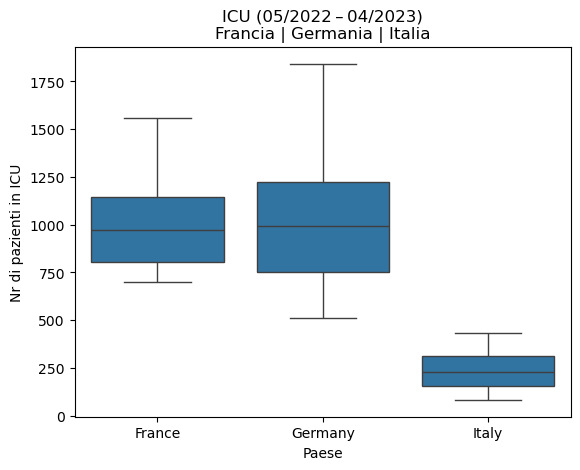

In [4]:
#Req#4 Ci focalizziamo sui paesi Italia, Germania e Francia
    # differenza tra i paesi per i pazienti in ICU
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/matte/EPICODE/PYTHON EXAM/owid-covid-data.csv', parse_dates=['date'])

# Mantengo solo le countries interessate
countries = ['Italy', 'Germany', 'France']
df = df[df['location'].isin(countries)]

df['date'] = pd.to_datetime(df['date'],format='%d/%m/%Y') #fornisco la conversione corretta
# restringo i dati nella finestra temporale indicata                            
start = pd.Timestamp('2022-05-01')
end   = pd.Timestamp('2023-04-30')
mask = (df['date'] >= start) & (df['date'] <= end)
df = df.loc[mask]

df = df.dropna(subset=['icu_patients'])

# espongo tramite boxplot i dati ottenuti
sns.boxplot(x='location',
            y='icu_patients',
            data=df,
)
plt.title('ICU (05/2022 – 04/2023)\nFrancia | Germania | Italia')
plt.xlabel('Paese')
plt.ylabel('Nr di pazienti in ICU')
plt.show()

# notiamo subito come Germania e Francia presentino valori mediani simili, indicante di come il carico ICU fosse particolarmente impattante
# in aggiunta, la Germania presenta dei picchi molto alti e una variabilità altrettanto alta
# in questo quadro l'Italia è in range completamente differente, bassa variabilità e valori mediani inferiori di almeno 4 volte inferiore

Dati mancanti per paese:
 location
France       0
Germany    365
Italy        0
Spain        0
Name: hosp_patients, dtype: int64

Totale pazienti ospedalizzati nel 2021:
  location  hosp_patients
0   France      6008717.0
1  Germany            0.0
2    Italy      4419950.0
3    Spain      2411706.0


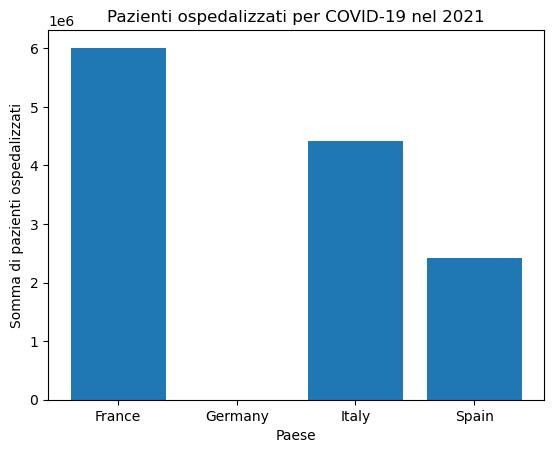

In [5]:
# Req#5 per le nazioni Italia Germania Francia e Spagna nel 2021:
# mostrare la somma dei pazienti ospitalizzati
# indicare se i dati nulli sono gestibili

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/matte/EPICODE/PYTHON EXAM/owid-covid-data.csv', parse_dates=['date'])

# Mantengo solo le countries interessate
countries = ['Italy', 'Germany', 'France', 'Spain']
df = df[df['location'].isin(countries)]

df['date'] = pd.to_datetime(df['date'],format='%d/%m/%Y') #fornisco la conversione corretta
df = df[(df['date'].dt.year == 2021)]# restringo i dati solo per il 2021

# esaminiamo il dataset per valori nulli 
missing_counts = df['hosp_patients'].isna().groupby(df['location']).sum()
print("Dati mancanti per paese:\n", missing_counts) #noteremo che la Germania non ha dati registrati

df['hosp_patients'] = df['hosp_patients'].fillna(0) #dopo aver analizzato il df risultante, eseguo un .fillna() per gestire i dati nulli

#seguendo la traccia, ho eseguito la somma di <hosp_patients> per ogni <location>
#trattandosi però di dati "stock" giornalieri e non progressivi, questa operazione di somma non mi ha convinto
#con i dati a disposizione, c'è un grosso limite nella rappresentazione della richiesta
#banalmente perchè una persona può essere rimasta in ospedale anche 10gg, 20gg, e magari anche di più
#e il dato <hosp_patients> ci porta una fotografia giornalieri dello stato di ospedalizzazione di tutti i pazienti
#ma sommare una persona 10vv, 20vv, o magari anche di più porta una situazione fallace ed incongruente con la realtà


totals = (
    df
    .groupby('location')['hosp_patients']
    .sum()
    .reset_index()
)

print("\nTotale pazienti ospedalizzati nel 2021:")
print(totals)

plt.bar(totals['location'],
        totals['hosp_patients'],
)
plt.title('Pazienti ospedalizzati per COVID‑19 nel 2021')
plt.xlabel('Paese')
plt.ylabel('Somma di pazienti ospedalizzati')
plt.show()

# nel grafico la Germania porta dati nulli perché, come segnalato in precedenza, non sono presenti record per il 2021
# tuttavia per coerenza con la traccia, l'esclusione dal grafico sarebbe stata imprecisa